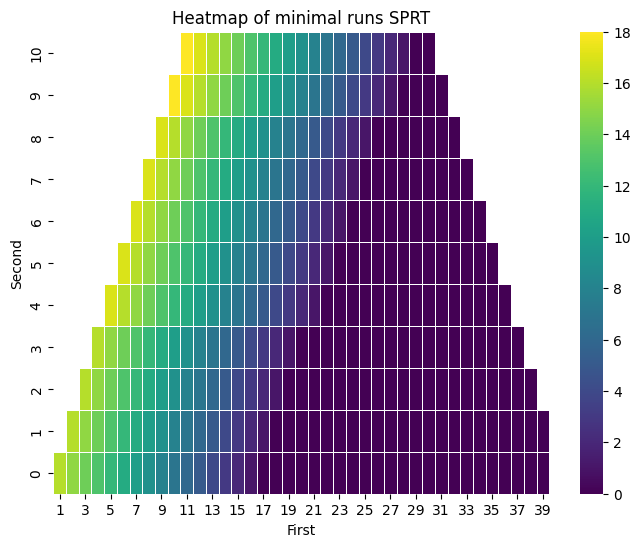

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

test = SprtConfidenceModel()

# Store results as a list of dictionaries
results = []

for first in range(0, 40):
    for second in range(0, first):
        for i in range(0, 40):
            if first + second + i > 40:
                continue
            if test.test(first + i, second):
                results.append({"First": first, "Second": second, "I": i})
                break

# Convert to DataFrame
df = pd.DataFrame(results)

# Pivot the DataFrame to create a heatmap-friendly format
heatmap_data = df.pivot(columns="First", index="Second", values="I")

# Plot using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap="viridis", linewidths=0.5, cbar=True)
plt.xlabel("First")
plt.ylabel("Second")
plt.title("Heatmap of minimal runs SPRT")
plt.gca().invert_yaxis()
plt.show()


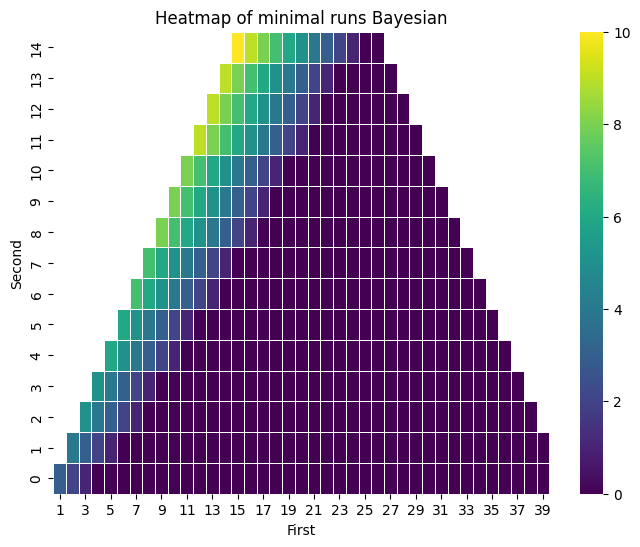

In [36]:
test = BayesianConfidenceModel()

# Store results as a list of dictionaries
results = []

for first in range(0, 40):
    for second in range(0, first):
        for i in range(0, 40):
            if first + second + i > 40:
                continue
            if test.test(first + i, second):
                results.append({"First": first, "Second": second, "I": i})
                break

# Convert to DataFrame
df = pd.DataFrame(results)

# Pivot the DataFrame to create a heatmap-friendly format
heatmap_data = df.pivot(columns="First", index="Second", values="I")

# Plot using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap="viridis", linewidths=0.5, cbar=True)
plt.xlabel("First")
plt.ylabel("Second")
plt.title("Heatmap of minimal runs Bayesian")
plt.gca().invert_yaxis()
plt.show()


/var/folders/29/9yggtmg51vgch_z7cvw04sp80000gn/T/ipykernel_6736/3075850600.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.12, 1, 0.95])


FileNotFoundError: [Errno 2] No such file or directory: 'figure/expected_minimal_trials.pdf'

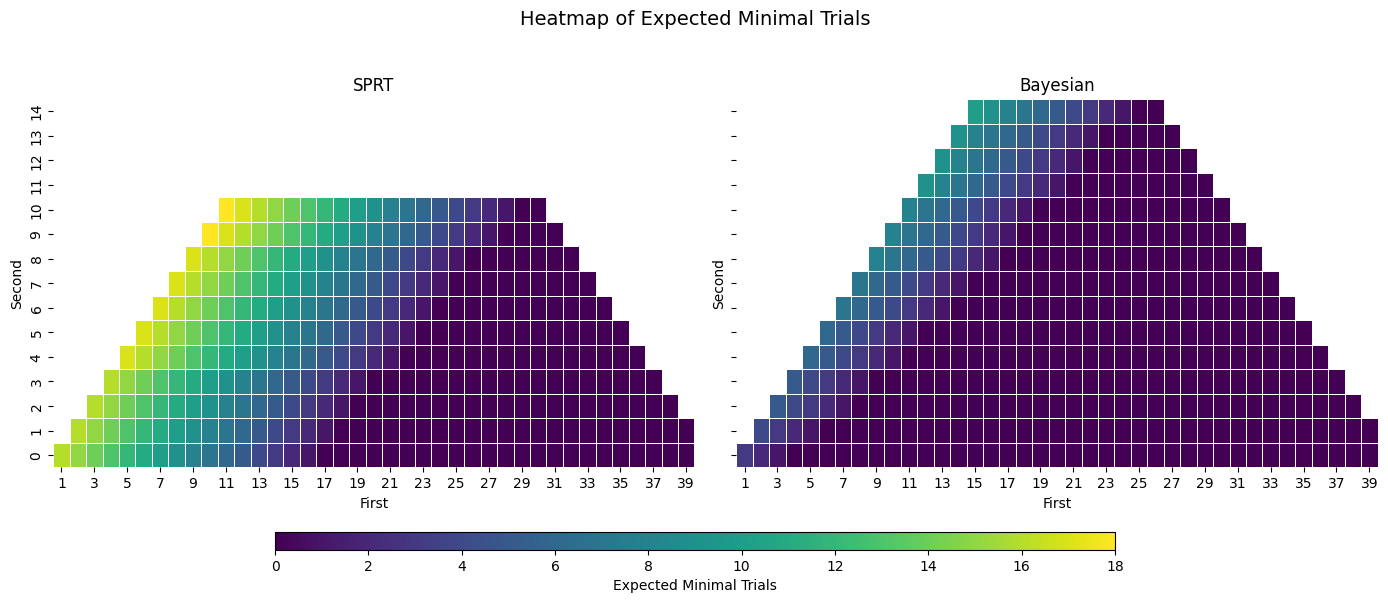

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to generate heatmap data
def generate_heatmap_data(model):
    test = model()
    results = []

    for first in range(0, 40):
        for second in range(0, first):
            for i in range(0, 40):
                if first + second + i > 40:
                    continue
                if test.test(first + i, second):
                    results.append({"First": first, "Second": second, "I": i})
                    break

    # Convert to DataFrame
    df = pd.DataFrame(results)
    
    # Pivot the DataFrame to create a heatmap-friendly format
    heatmap_data = df.pivot(columns="First", index="Second", values="I")
    
    return heatmap_data

# Generate data for both models
heatmap_sprt = generate_heatmap_data(SprtConfidenceModel)
heatmap_bayesian = generate_heatmap_data(BayesianConfidenceModel)

# Set common color scale range
vmin = min(heatmap_sprt.min().min(), heatmap_bayesian.min().min())  # Minimum value
vmax = max(heatmap_sprt.max().max(), heatmap_bayesian.max().max())  # Maximum value

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)  # Share y-axis

# SPRT Heatmap (no colorbar)
sns.heatmap(heatmap_sprt, cmap="viridis", linewidths=0.5, cbar=False, ax=axes[0], vmin=vmin, vmax=vmax)
axes[0].set_title("SPRT")
axes[0].set_xlabel("First")
axes[0].set_ylabel("Second")
axes[0].invert_yaxis()

# Bayesian Heatmap (no colorbar)
sns.heatmap(heatmap_bayesian, cmap="viridis", linewidths=0.5, cbar=False, ax=axes[1], vmin=vmin, vmax=vmax)
axes[1].set_title("Bayesian")
axes[1].set_xlabel("First")
axes[1].invert_yaxis()

# Add a single colorbar at the bottom
cbar_ax = fig.add_axes([0.2, 0.08, 0.6, 0.03])  # [left, bottom, width, height]
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap="viridis", norm=plt.Normalize(vmin=vmin, vmax=vmax)), 
                    cax=cbar_ax, orientation='horizontal')
cbar.set_label("Expected Minimal Trials")

# Overall title
fig.suptitle("Heatmap of Expected Minimal Trials", fontsize=14)

# Adjust layout
plt.tight_layout(rect=[0, 0.12, 1, 0.95])
plt.savefig("figures/expected_minimal_trials.pdf", dpi=300)
# Show the plots
plt.show()
